   ID Gender  Years of Experience               Position  Salary
0   1      F                    4        DevOps Engineer  109976
1   2      M                    6        DevOps Engineer  120088
2   3      M                   17          Web Developer  181301
3   4      M                    7  Systems Administrator   77530
4   5      F                   13  Systems Administrator  152397


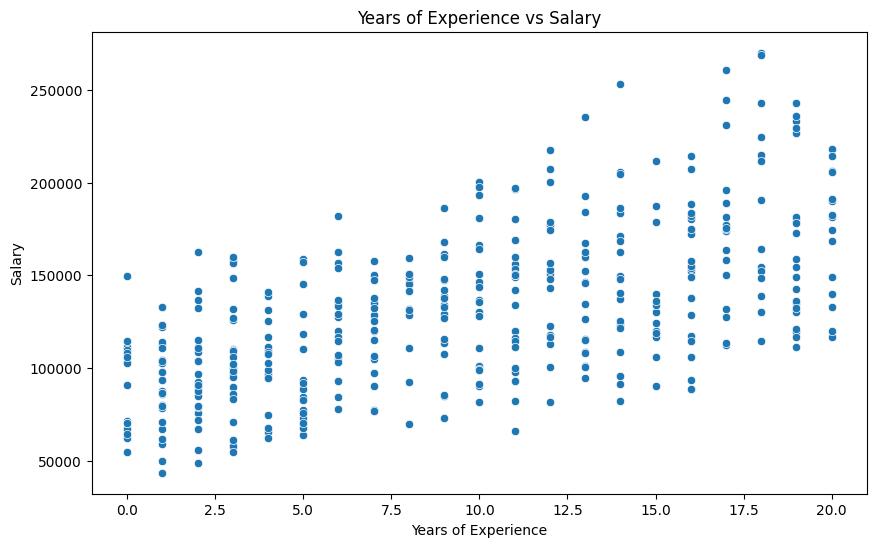

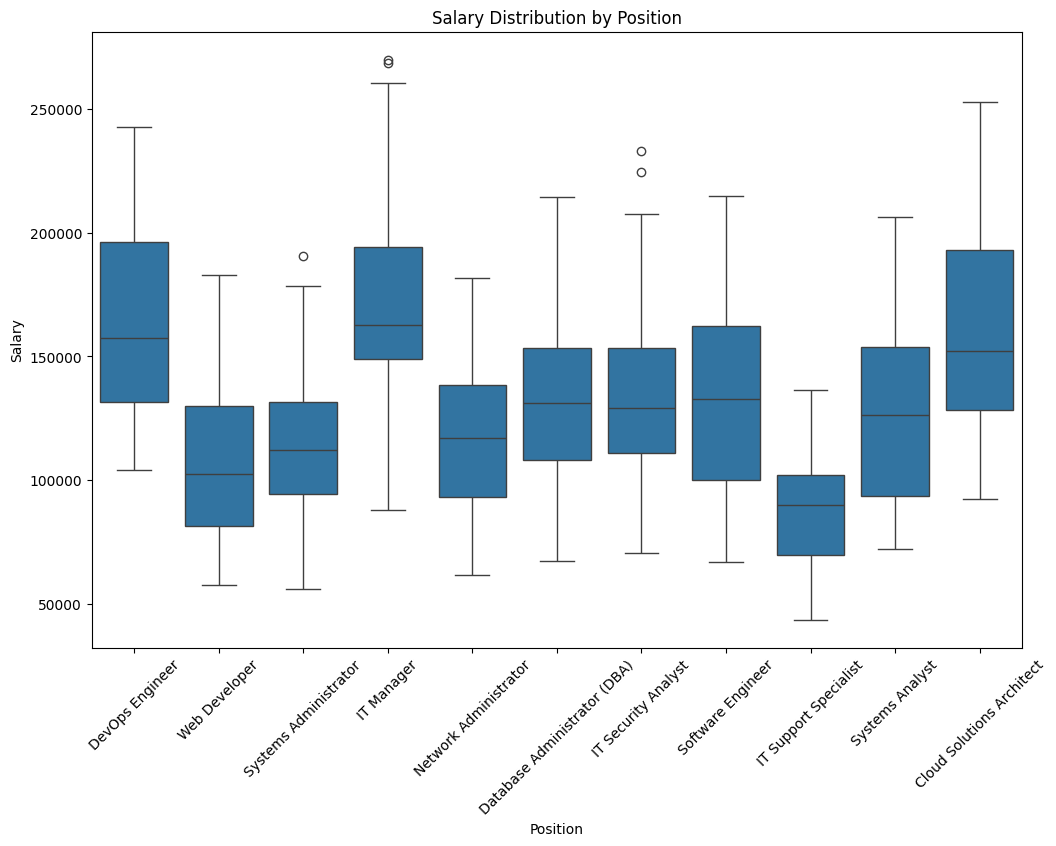

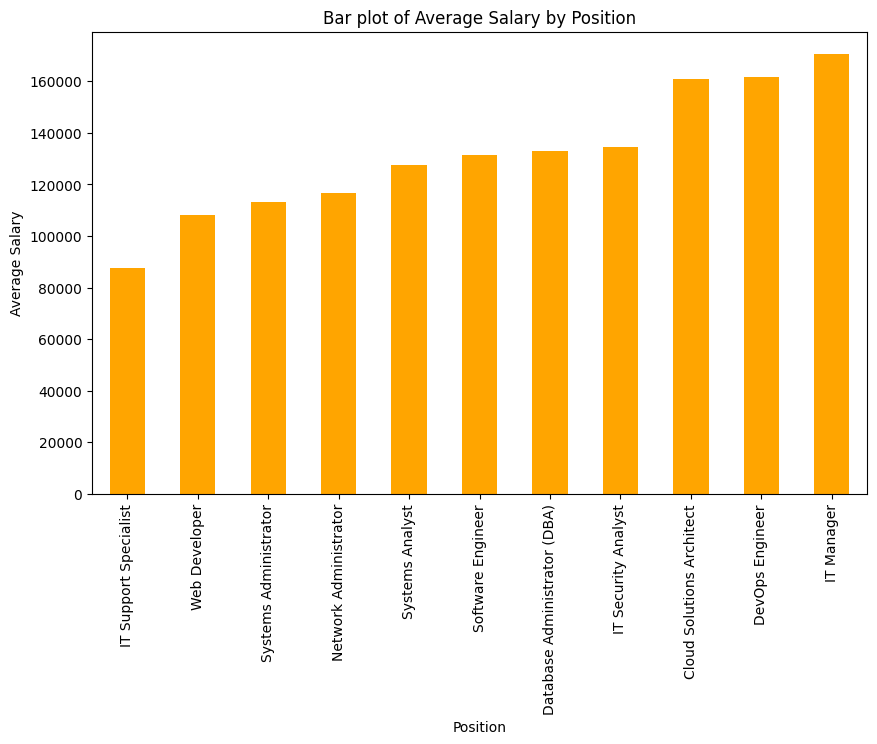

Mean Squared Error: 1026137492.5039952


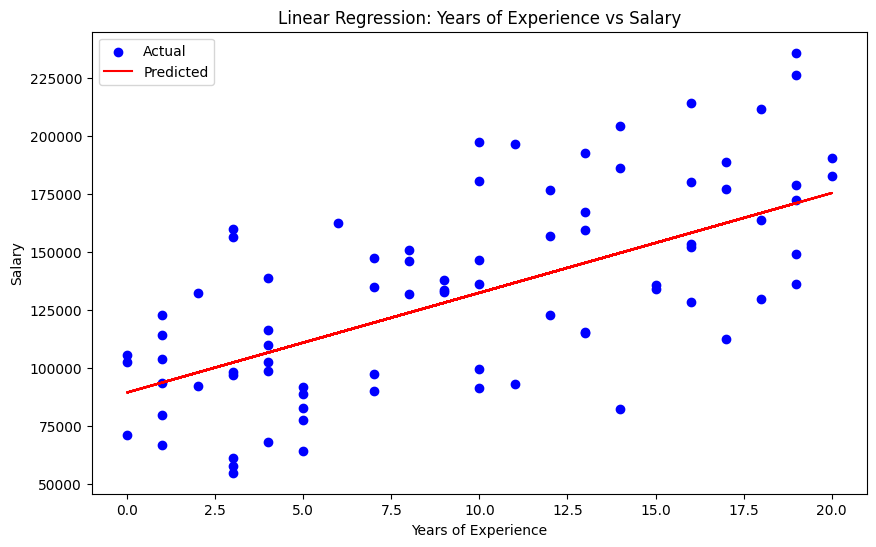

In [8]:
'''The dataset aims to reflect realistic distributions and variations within the IT industry, particularly how salaries tend to increase with experience and the specific job role.'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('employee_data.csv')                   #loading dataset

print(df.head())                                        #display given data set(first few rows)

#showing data as graohs(data visaulisation)
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)           #set x and y axis,used sns for more visual and better graphical represenation
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#Box plot (doubt-have to ask about exact logic....outliers and stuff)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='Salary', data=df)
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

avg_salary_by_position = df.groupby('Position')['Salary'].mean().sort_values()          #bar plot

plt.figure(figsize=(10, 6))
avg_salary_by_position.plot(kind='bar', color='orange')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.title('Bar plot of Average Salary by Position')
plt.show()

#selecting features for training the ML model
X = df[['Years of Experience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)          #predict the data

#calculating mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))                                     #to incorporate the linear regression line in the graph
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
